# Lab 3 (Part B): Classification with kNN

<div class="alert alert-block alert-danger">

__IMPORTANT__ 
Please complete this Jupyter Notebook file and upload it to blackboard __before 13 February 2020__.
</div>

In this part of the Lab, you will implement the *k nearest neighbours* (kNN) classification method, and apply it to a dataset. Your task is to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a *k nearest neighbours* classifier.

## Loading the data
We have a file `microchips-dataset.csv` which contains the dataset for our *nonlinear* classification problem. The first column corresponds to the result of "microchip test 1", the second column corresponds to the result of "microchip test 2", and the third column is the class-label indicating if the microchip has been accepted or rejected (1 = Accepted, 0 = Rejected).

<img src="imgs/MicroshipDataLab3B.png" />

Complete the following Python code to load the dataset from the csv file into the variables `X` (input data matrix) and `y` (output class-labels). `X` should be a matrix with $n$ lines and $2$ columns (i.e. two feature) corresponding to "microchip test 1" and "microchip test 2". `y` should be a numpy array of $n$ elements.

**Note**: You DO NOT need to add an additional column of all ones to the dataset as we are NOT using a linear model of the form $h_{\theta}(x)={\theta}^T x$ in this part of the Lab.

In [19]:
%matplotlib inline
import numpy as np

filename = "datasets/microchips-dataset.csv"

""" TODO:
Write the code to load the dataset from the `filename` into the variables X and y.
X should be a numpy array of n lines and 2 columns (the input data matrix).
y should be a numpy array of n elements (the outputs vector).
Try to do it by yourself and only check the code used in previous Labs if you are uncertain.
"""
mydata = np.genfromtxt(filename, delimiter=",")
n = len(mydata)

X = mydata[:, :2]
y = mydata[:, -1]

print('X:',X[:5], '\ny:',y[:5])


X: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]] 
y: [1. 1. 1. 1. 1.]


## Visualizing the data
Similar to the previous part of the Lab, before starting to implement anything, it is always good to visualize the data if possible. Complete the following Python code so that it displays a figure like the one shown below. The two dimensions (features) correspond to the two tests results, and the class-labels are shown with different markers/colors.

<img src="imgs/MicroshipScatterPlotLab3B.png" width="500px" />

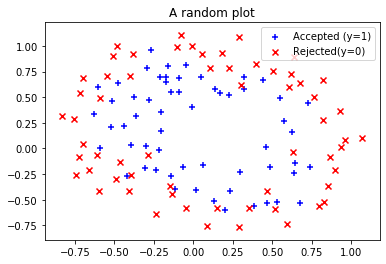

In [20]:
import matplotlib.pylab as plt

""" TODO:
Write code here to produce a scatter plot of the training 
dataset like the one shown in the figure above.
"""
X0 = X[y == 1]
X1 = X[y==0]
fig, ax = plt.subplots()
ax.scatter(X0[:,0], X0[:,1], marker="+", color="blue", label="Accepted (y=1)")
ax.scatter(X1[:,0], X1[:,1], marker="x", color="Red", label="Rejected(y=0)")

ax.set_title("A random plot")
plt.legend()


**Side Note:** From the figure you can see that our dataset cannot be separated into positive (class 1) and negative (class 0) examples by a straight-line through the plot. Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary. If one still wants to use logistic regression, then one way to fit the data better is to create more features from each data-point by mapping the features into polynomial terms of $x_1$ and $x_2$ (e.g. $x_1^2$, $x_1 x_2$, etc ...). However, in this part of the Lab, we will use a kNN which is a nonlinear classifier.

## Implementing the k Nearest Neighbours (kNN) classifier

In the following code, you are asked to first implement the definition of the distance function `dist(u, v)` which computes the euclidean distance between two vectors $u \in \mathbb{R}^d$ and $v \in \mathbb{R}^d$. The euclidean distance between $u$ and $v$ is defined as: $\left \| u - v \right \| = \sqrt{\sum_{j=1}^{d} (u_i - u_v)^2}$. Note that this is simply the norm of the vector $u - v$, so you can either code it by yourself in pure Python, or make use of the numpy function `np.lianalg.norm(..)` which returns the norm of a given vector (or you can try both to see if you implemented it correctly).

One you implement the distance function, you are asked to implement the definition of the function `prediction(x, X, y, k=5)`. This function takes as arguments a new data-point $x$ for which we want to predict the class-label, the training input data $X$, the output class-labels $y$, and a parameter $k$ corresponding to the number of nearest neighbours to use. The function should return the predicted class-label for $x$. To help you implement the function, you can follow the comments and make use of some predefined functions such as:
- [numpy.argsort](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html)
- [collections.Counter](https://docs.python.org/dev/library/collections.html#collections.Counter.most_common)

In [21]:
from collections import Counter
from copy import copy
""" TODO
Implement the definition of the function dist(u, v) which
computes the euclidean distance between two arrays u and v.
"""
def dist(u, v):
    return np.sum((np.linalg.norm(u-v)**2)*(1/2))


""" TODO:
Implement the definition of the function prediction(x, X, y, k=5). You should return 
the predicted class-label for x, using the training dataset X, y, and k nearest neighbours.
"""
def prediction(x, X, y, k=5):
    # TODO: Compute the list of distances from x to each point in X
    distance = np.array([dist(u,x) for u in X])
    
    # TODO: Get the list of indices sorted according to their corresponding distance
    sorted_indices = np.argsort(distance)
    # TODO: Take the class-labels corresponding to the first k indices (closest points to x)
    labels = y[sorted_indices[:k]]
    
    # TODO: The predicted class-label is the most common one ammong these class-labels
    most_common = Counter(labels).most_common(1)[0]
    return most_common[0]


""" TODO:
Test your function prediction(x, X, y, k=5) on x = np.array([0, 0]); it 
should return the class-label 1 (i.e. accepted microship).
"""
x = np.array([0, 0])
prediction(x, X, y, k=5)

1.0

## Plotting the decision boundary



In the following code, a function `plot_decision_boundary(func, X, y, k)` is provided to you. This fonction takes as a first argument the name of the prediction function (that you defined previously), and plots the decision boundary and the training dataset. You can read it if you want, but you DO NOT need to fully understand it. Your task here is to simply call the function `plot_decision_boundary(func, X, y, k)` a couple of times with different values of $k$, and see the difference in the decision boundary. Is the kNN decision boundary more complex when $k$ is smaller? It should be.

*Note*: when the function is called, it can take some time (few seconds) before the plots are produced.

Please wait. This might take few seconds to plot ...


<ipython-input-22-4b55256f14a6>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Please wait. This might take few seconds to plot ...
Please wait. This might take few seconds to plot ...


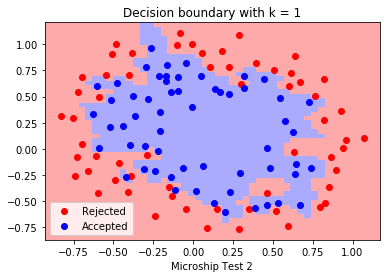

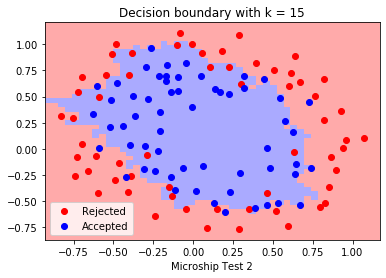

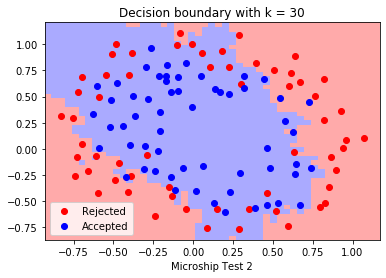

In [22]:
from matplotlib.colors import ListedColormap

# This fonction plots the decision boundary and the training dataset
# You can read it if you want, but you don't need to fully understand it.
def plot_decision_boundary(func, X, y, k):
    print("Please wait. This might take few seconds to plot ...")
    min_x1, max_x1 = min(X[:, 0]) - 0.1, max(X[:, 0]) + 0.1
    min_x2, max_x2 = min(X[:, 1]) - 0.1, max(X[:, 1]) + 0.1

    plot_x1, plot_x2 = np.meshgrid(np.linspace(min_x1, max_x1, 50), np.linspace(min_x2, max_x2, 50))
    points = np.c_[plot_x1.ravel(), plot_x2.ravel()]
    preds = np.array([ func(x, X, y, k) for x in points ])
    preds = preds.reshape(plot_x1.shape)

    X0 = X[y==0]
    X1 = X[y==1]

    fig, ax = plt.subplots()
    ax.pcolormesh(plot_x1, plot_x2, preds, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    ax.scatter(X0[:, 0], X0[:, 1], color="red", label="Rejected")
    ax.scatter(X1[:, 0], X1[:, 1], color="blue", label="Accepted")
    ax.set_xlabel("Microship Test 1")
    ax.set_xlabel("Microship Test 2")
    ax.set_title("Decision boundary with k = {}".format(k))
    plt.legend()
    fig.show()


""" TODO:
Call here the function plot_decision_boundary(..) a couple of times with 
different values of k, and see the difference in the decision boundary. 
Normally, the decision boundary looks more complex when k is smaller.
"""
plot_decision_boundary(prediction, X, y, k=1)  # with k = 1
plot_decision_boundary(prediction, X, y, k=15) # with k = 15
plot_decision_boundary(prediction, X, y, k=30) # with k = 30


## Evaluating the kNN classifier
One way to evaluate the quality of our classifier is to see how well it predicts on our training set. In this part, your task is to complete the Python code below to report the training accuracy of your classifier by computing the percentage of examples for which you correctly predicted the class-label.

*Note*: We will see later in the course that computing the ***training** accuracy* is NOT a good way to evaluate the quality of your machine learning model.

In [23]:
""" TODO:
Predict the class-labels of the data-points in the training set by calling the function 
prediction(..) on each data-point in X. Then, compute the classification accuracy by comparing 
the predicted class-labels with the actual (true) class-labels y. Use a value of k = 15.
"""

y_pred = [prediction(x, X, y, k=5) for x in X]
accuracy = np.sum(np.array([1 if y_pred[i] == y[i] else 0 for i,_ in enumerate(X)]))/len(y)
print("Accuracy", round(accuracy,2), "%")

Accuracy 0.86 %


## OPTIONAL: Weighted k Nearest Neighbours (kNN) classifier
This task is optional. Your task here is to re-define your previous function `prediction(x, X, y, k=5)` so that it corresponds to the weighted kNN. You can define the weights as the inverse of the distances.

In [48]:

""" TODO:
Implement the definition of the function prediction_weighted(x, X, y, k=5). You should return 
the predicted class-label for x, using the training dataset X, y, and k.
"""
def prediction_weighted(x, X, y, k=5):
    distance = np.array([dist(u,x) for u in X])
    knn_index = np.argsort(distance)[:k] # Get index for closest nodes
    top_k_distances = distance[knn_index]
    predictionValues = {0:0,1:0}
    
    for index, value in zip(knn_index, top_k_distances):
        predictionValues[y[index]] += 1/value
    
    prediction = {k : v for k, v in sorted(predictionValues.items(), key=lambda item: item[1],reverse=True)}
    prediction = list(prediction.keys())[0]
    return prediction

"""
TODO
Test the function prediction_weighted(x, X, y, k) by calling it. Then, 
call the function plot_decision_boundary(..) a couple of times with 
different values of k, and see the difference in the decision boundary.
"""
plot_decision_boundary(prediction_weighted, X, y, k=1)  # with k = 1
plot_decision_boundary(prediction_weighted, X, y, k=15) # with k = 15
plot_decision_boundary(prediction_weighted, X, y, k=30) # with k = 30



SyntaxError: invalid syntax (<ipython-input-48-fbc960afc824>, line 14)